[TLP:WHITE] FROM 2025-01-13

<font color="gray">

**FITS Project**

Copyright (C) 2025 Yaël Moussouni (yael.moussouni@etu.unistra.fr)

**exploration.ipynb**

Copyright (C) 2025 Yaël Moussouni (yael.moussouni@etu.unistra.fr)

This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation; either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program. If not, see [www.gnu.org/licenses/](https://www.gnu.org/licenses/).

</font>

# Fits Header Extractor: Exploration of FITS files

Author: Moussouni, Yaël (MSc student; yael.moussouni@etu.unistra.fr)\
Institution:  Université de Strasbourg, CNRS, Observatoire astronomique
              de Strasbourg, UMR 7550, F-67000 Strasbourg, France\
Date: 2025-01-12

## Introduction

The goal of this project is to provide an example of usage for the [fits-header-extractor](https://github.com/Yael-II/Fits-Header-Extractor) library with some FITS samples. Fits are widely used file formats in astronomy. The content of a Fits file is in two parts: the header and the data. The goal of the [fits-header-extractor](https://github.com/Yael-II/Fits-Header-Extractor) Python package is to explore fits header.

## Requirements and installation

<font color="red">**Before proceeding further, see README.md first.**</font>

Normally, all the packages are already installed. Make sure that the virtual environment is actiavted:

In [1]:
import sys
print(sys.prefix)

/Users/yael/Documents/Courses/M2-ADS/Classes/S3-UE3-Prog_Script/Files/Project/venv


The above cell should print `[your working directory]/venv`.

## Initialisation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.coordinates import Angle, SkyCoord
from astropy import units as u
from astropy.wcs import WCS

from fits_header_extractor import FitsHeaderExtractor

In [3]:
%matplotlib widget
if "YII_light_1" in plt.style.available: plt.style.use("YII_light_1")

## FITS Extraction and Processing

In the next cell, we extract all the FITS files in the "./Input/" directory. I also added in this directory non-FITS files (simply ignored based on their extension) and corrupted files (issue an <font color="#ED1C24">Error!</font>). Also, some of the FITS files from the original data set do not meet the FITS files format requirements. Most of them are corrected (issues a <font color="#E8BD0F">Warning</font>), and the other ones are ignored (issuing an <font color="#ED1C24">Error!</font>)

The `verbatim` arguments can be used to select the level of verbosity:
- <font color="#06518E">Info</font>: only shown if `verbatim` is `True` (steps, success, etc.)
- <font color="#E8BD0F">Warning</font>: only shown if `verbatim` is `True` (non-standard format found, but corrected with no ambiguity)
- <font color="#ED1C24">Error</font>: always shown. (non-standard format is not recognized, the file is ignored)

The `resolve_name` can be used to select if the `curate()` method should check if the source name in the FITS header can be recognized or not (by default, this is set to False, as most of the name are not recognized using Sesame). 

In [4]:
fhe = FitsHeaderExtractor()

fhe.extract_header_directory(verbatim=True)
fhe.curate(resolve_name=False, verbatim=False)
fhe.make_moc(verbatim=False)

print("")

Filelist: ['imagerf.fit', 'imageih.fit', 'G327.617-0.364_I4.fits', 'SN1987A_cut_35_smHB.fits', 'G351.702+0.672_atlasgal.fits', '5GHz_n_f.fits', 'G351.632-0.459_atlasgal.fits', 'UGC_09618_S_2MASS_H.fits', 'UGC_09618_2MASS_H.fits', 'SNaverage5-0.fits', 'whsky072.fit', 'u.fit', 'empty_file.fits', '2013.1.01292.S_SB_X4eb_GB_X4ec_MB_X4ed_2-38011_sci.spw0_1_2_3.cont.I.image.fits', 'N2.20100426.52760.fits', 'G9_POLIN.fit', 'NGC_4486_MIPS_M1.fits', 'av_galcen_2mass.fits', 'id12_GAL-Survey-GC.fpsf.fits', 'SN1987A_87_smHB.fits', 'av_galcen_spitzer.fits', '2013.1.00034.S_SB_X5_GB_X6_MB_X7_midz_cell10_25342_sci.spw0_1_2_3.cont.I.image.fits']
Current file: imagerf.fit - success.
Current file: imageih.fit - success.
Current file: G327.617-0.364_I4.fits - success.
Current file: SN1987A_cut_35_smHB.fits - success.
Current file: G351.702+0.672_atlasgal.fits - success.
Current file: 5GHz_n_f.fits - success.
Current file: G351.632-0.459_atlasgal.fits - success.
Current file: UGC_09618_S_2MASS_H.fits - su

Done. Only 6 of the 22 FITS files are ignored, and the non-FITS files are correctly ignored. With `verbatim` set to `True`, a lot of warnings are also issued: a significant part of these files are not formated in a standard way, but most of them are corrected automatically (using `astropy.wcs` and other hand-made corrections).

## Data Exploration

Now, let's have a closer look to the `UGC_09618_S_2MASS_H.fits` (randomly chosen), for instance.

Thanks to the `print_header()` method, we can have a look at the header of this file, and get its footprint with the `get_footprint()` method. The footprint can the be plotted with `matplotlib.pyplot` or `ipyaladin`.


File: UGC_09618_S_2MASS_H.fits
SIMPLE  =                    T / This is a FITS file                            
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                  539 / NUMBER OF ELEMENTS ALONG THIS AXIS             
NAXIS2  =                 2094 / NUMBER OF ELEMENTS ALONG THIS AXIS             
EXTEND  =                    T / This file may contain FITS extensions          
EQUINOX =            2000.0000 / Mean equinox                                   
RADECSYS= 'ICRS    '           / Astrometric system                             
CTYPE1  = 'RA---TAN'           / WCS projection type for this axis              
CUNIT1  = 'deg     '           / Axis unit                                      
CRVAL1  =      2.242261747E+02 / World coordinate on this axis                  
CRPIX1  =      2.700000000E+02 / Reference pixel on this axis                

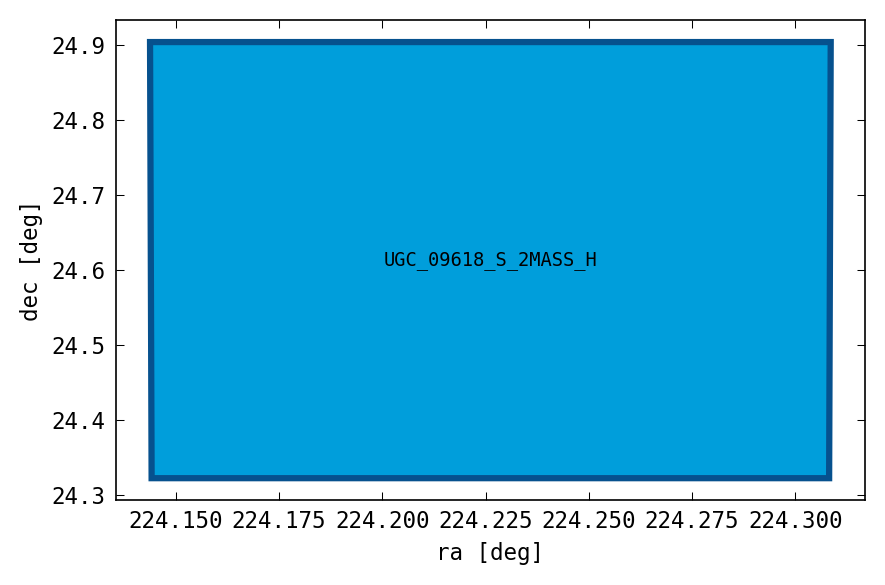

In [5]:
i = fhe.get_index("UGC_09618_S_2MASS_H.fits")
if i is not None:
    fhe.print_header(i)
    fp = fhe.get_footprint(i)[0]
else:
    fp = [[None, None]]
    
fig, ax = plt.subplots(1)
ax.set_xlabel("ra [deg]")
ax.set_ylabel("dec [deg]")

ax.fill(fp[:,0], fp[:,1], 
        facecolor='C5', 
        edgecolor='C0', 
        linewidth=3)

ax.text(np.mean(fp[:,0]), np.mean(fp[:,1]), 
        "{:.25}".format(fhe.file_list[i]
                        .replace(".fits", "")
                        .replace(".fit", "")),  # Truncated at 25 characters
        va="center",
        ha="center")
fig.tight_layout()
plt.show()

Now let's do that with all the available MOCs.

First, we select a subset of MOCs (i.e. only not-None MOCs; this step is optional)

In [6]:
#fhe.print_header()
fps = fhe.get_footprint()

subset =  [i for i in range(len(fhe.moc_list)) if fhe.moc_list[i] is not None] 
fps = fhe.get_footprint(subset)
name_list = [fhe.file_list[i] for i in subset]
# only selecting the not-None footprints

Error! too many values to unpack (expected 2). (in get_footprint)
"5GHz_n_f.fits" footprint will be ignored.
Error! too many values to unpack (expected 2). (in get_footprint)
"2013.1.01292.S_SB_X4eb_GB_X4ec_MB_X4ed_2-38011_sci.spw0_1_2_3.cont.I.image.fits" footprint will be ignored.
Error! too many values to unpack (expected 2). (in get_footprint)
"G9_POLIN.fit" footprint will be ignored.
Error! too many values to unpack (expected 2). (in get_footprint)
"2013.1.00034.S_SB_X5_GB_X6_MB_X7_midz_cell10_25342_sci.spw0_1_2_3.cont.I.image.fits" footprint will be ignored.


Again, here some errors are issued for the MOCs' footprints that cannot be computed, but the other ones are still computed.
`subset` contains the id of all selected MOCs, `fps` their footprints, and `name_list` their names.

I will now plot the (expected) 16 footprints in 4 × 4 subplots.

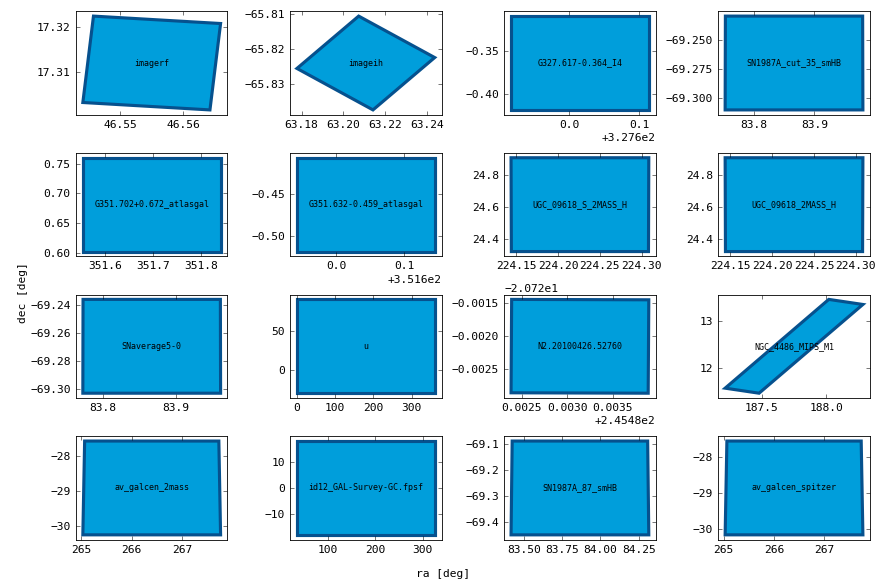

In [7]:
# Definition of the number of subplots (i.e. number of not-None footprints)
N = len(subset)
if N%4 != 0: N += 3 # Just in case other fits are added or removed

fig, axs = plt.subplots(N//4, 4, 
                        figsize=(5.9*2,3.9*2), 
                        dpi=75)
axs = axs.flatten()

# Individual plots
for i in range(N):
    ax = axs[i]
    fp = fps[i]

    ra = fp[:,0]
    dec = fp[:,1]
    
    ax.fill(ra, dec, 
            facecolor='C5', 
            edgecolor='C0', 
            linewidth=3)

    ax.text(np.mean(ra), np.mean(dec), 
            "{:.25}".format(name_list[i]
                            .replace(".fits", "")
                            .replace(".fit", "")),
            va="center", 
            ha="center",
            fontsize=8)

fig.supxlabel("ra [deg]")
fig.supylabel("dec [deg]")
fig.tight_layout()
plt.show()

We can also check if a coordinate is within one of the MOC (this also works with a subset).

In [8]:
coord_1 = SkyCoord(ra=0*u.deg, dec=0*u.deg)
coord_2 = SkyCoord(ra=266*u.deg, dec=-29*u.deg)

is_inside_1 = fhe.is_in_wcs(coord_1, subset)
index_inside_1 = np.argwhere(is_inside_1).flatten()
name_inside_1 = [name_list[i] for i in index_inside_1]

is_inside_2 = fhe.is_in_wcs(coord_2, subset)
index_inside_2 = np.argwhere(is_inside_2).flatten()
name_inside_2 = [name_list[i] for i in index_inside_2]

print("{} is in {}\n{} is in {}".format(coord_1.to_string("hmsdms"), 
                                        name_inside_1, 
                                        coord_2.to_string("hmsdms"), 
                                        name_inside_2)
                                 .replace("[", "")
                                 .replace("]", ""))

00h00m00s +00d00m00s is in 'u.fit'
17h44m00s -29d00m00s is in 'u.fit', 'av_galcen_2mass.fits', 'id12_GAL-Survey-GC.fpsf.fits', 'av_galcen_spitzer.fits'


We obtain the expected result, compared to previous plots.

## Conclusion

This libriary allows the user to extract fits headers, curate, make MOCs, visualize, and interact with them.
The library internal variables are open by design (and not private), to enable any other computation using MOC or WCS objects directly. 

## Acknoledgments

This work made use of [Astropy](http://www.astropy.org), a community-developed core Python package and an ecosystem of tools and resources for astronomy ([2013A&A...558A..33A](https://ui.adsabs.harvard.edu/abs/2013A%26A...558A..33A/abstract), [2018AJ....156..123A](https://ui.adsabs.harvard.edu/abs/2018AJ....156..123A/abstract), [2022ApJ...935..167A](https://ui.adsabs.harvard.edu/abs/2022ApJ...935..167A/abstract)); [MOCpy](https://github.com/cds-astro/mocpy/), a Python library developped by the CDS to easily create and manipulate MOCs; [Numpy](https://numpy.org/), a fundamental package for scientific computing in Python ([DOI:10.1038/s41586-020-2649-2](https://doi.org/10.1038/s41586-020-2649-2)); and [Matplotlib](https://matplotlib.org/), a comprehensive library for creating static, animated, and interactive visualizations. ([DOI:10.1109/MCSE.2007.55](https://doi.org/10.1109/MCSE.2007.55)). 

This project has been started in the context of a MSc2 Python project, at the Observatoire astronomique de Strasbourg.